# Cambio del Directorio de Trabajo

In [190]:
import os
cwd = os.getcwd()  # Get the current working directory (cwd)
print (cwd)

C:\Users\andyg\OneDrive\Becas PINN MICIT\Material Cenfotec BigData\Entrega 18 Build and Evaluate Models


In [191]:
os.chdir(r"C:\Users\andyg\OneDrive\Becas PINN MICIT\Material Cenfotec BigData\Entrega 18 Build and Evaluate Models")

# Importamos Librerias y Algortimos

In [192]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn import datasets
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install pandas-profiling
import cufflinks as cf
from pandas import Series, DataFrame
import matplotlib as mpl
import seaborn as sns 
%matplotlib inline
from matplotlib import pylab
from pylab import *
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

#Algortimos 

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier


#Metricas del Modelo y Evaluaciones
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

#Validacion Cruzada
from sklearn.model_selection import train_test_split

# Hacemos la Lectura del DataSet

In [193]:
#Lectura DataSet
CreditDF = pd.read_csv('CreditCardsClients.csv', header=1)
#creditDF = pd.read_csv(r'C:\Users\andyg\OneDrive\Becas PINN MICIT\Material Cenfotec BigData\Entrega 17 Prepare and Explore the Data\default of credit card clients.csv', header =1)
CreditDF.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [194]:
print (CreditDF)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [195]:
CreditDF.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [196]:
CreditDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# Eliminamos las Columnas que no vamos a Utilizar

In [197]:
#Borrado de Columnas no necesarias para la predicción
CreditDF = CreditDF.drop(["ID", "PAY_0", "PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"], axis=1)

In [198]:
CreditDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
default payment next month    30000 non-null int64
dtypes: int64(6)
memory usage: 1.4 MB


In [199]:
CreditDF.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

       default payment next month  
count                30000.000000  
mean                     0.221200  
std                      0.415062  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                      1.000000

In [200]:
CreditDF.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  default payment next month
0      20000    2          2         1   24                           1
1     120000    2          2         2   26                           1
2      90000    2          2         2   34                           0
3      50000    2          2         1   37                           0
4      50000    1          2         1   57                           0

In [201]:
pandas_profiling.ProfileReport(CreditDF)

In [202]:
ProfileReport(CreditDF).to_file(output_file="CreditDFProfiling.html")

# Eliminamos Valores Duplicados Detectados despúes del EDA

In [203]:
# dropping duplicate values 
CreditDF.drop_duplicates(keep=False,inplace=True) 

In [204]:
pandas_profiling.ProfileReport(CreditDF)

In [205]:
CreditDF.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  default payment next month
1      120000    2          2         2   26                           1
11     260000    2          1         2   51                           0
12     630000    2          2         2   41                           0
15      50000    2          3         3   23                           0
17     320000    1          1         1   49                           0

In [206]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [207]:
CreditDF.iplot()

In [208]:
# Column names
CreditDF.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'default payment next month'],
      dtype='object')

In [209]:
# Information about the data set
CreditDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7557 entries, 1 to 29996
Data columns (total 6 columns):
LIMIT_BAL                     7557 non-null int64
SEX                           7557 non-null int64
EDUCATION                     7557 non-null int64
MARRIAGE                      7557 non-null int64
AGE                           7557 non-null int64
default payment next month    7557 non-null int64
dtypes: int64(6)
memory usage: 413.3 KB


In [210]:
# Identifiy missing values
pd.isnull(CreditDF)

LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  \
1          False  False      False     False  False   
11         False  False      False     False  False   
12         False  False      False     False  False   
15         False  False      False     False  False   
17         False  False      False     False  False   
...          ...    ...        ...       ...    ...   
29988      False  False      False     False  False   
29991      False  False      False     False  False   
29992      False  False      False     False  False   
29994      False  False      False     False  False   
29996      False  False      False     False  False   

       default payment next month  
1                           False  
11                          False  
12                          False  
15                          False  
17                          False  
...                           ...  
29988                       False  
29991                       False  
29992                       False  
29994                       False  
29996                       False  

[7557 rows x 6 columns]

# Hacemos la Selección de las Variables

In [211]:
#features
features = CreditDF.iloc[:,0:5]
print('Resumen del Rango Seleccionado')
features.head()

Resumen del Rango Seleccionado


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
1      120000    2          2         2   26
11     260000    2          1         2   51
12     630000    2          2         2   41
15      50000    2          3         3   23
17     320000    1          1         1   49

In [212]:
features.index

Int64Index([    1,    11,    12,    15,    17,    21,    23,    44,    45,
               47,
            ...
            29973, 29976, 29977, 29978, 29979, 29988, 29991, 29992, 29994,
            29996],
           dtype='int64', length=7557)

In [213]:
print (features)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
1         120000    2          2         2   26
11        260000    2          1         2   51
12        630000    2          2         2   41
15         50000    2          3         3   23
17        320000    1          1         1   49
...          ...  ...        ...       ...  ...
29988     250000    1          1         1   34
29991     210000    1          2         1   34
29992      10000    1          3         1   43
29994      80000    1          2         2   34
29996     150000    1          3         2   43

[7557 rows x 5 columns]


In [214]:
# descriptive statistics
features.describe()

LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE
count     7557.000000  7557.000000  7557.000000  7557.000000  7557.000000
mean    214386.619029     1.531560     2.082308     1.477306    40.344846
std     145561.882789     0.499036     1.014376     0.576512    10.091491
min      10000.000000     1.000000     0.000000     0.000000    21.000000
25%      90000.000000     1.000000     1.000000     1.000000    32.000000
50%     200000.000000     2.000000     2.000000     1.000000    40.000000
75%     310000.000000     2.000000     3.000000     2.000000    47.000000
max    1000000.000000     2.000000     6.000000     3.000000    79.000000

# Definimos la Variable Dependiente

In [215]:
#dependent variable
depVar = CreditDF['default payment next month']

# Definimos las Variables X / Y

In [216]:
X = (features)
y=depVar

# Separamos los Datos de Entrenamiento y Prueba

In [217]:
 # Split train / test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Success of getting train / test dataset")
print("=======================================")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
print("=======================================")

Success of getting train / test dataset
X_train:  (5289, 5)
y_train:  (5289,)
X_test:  (2268, 5)
y_test:  (2268,)


In [218]:
X_train.shape, X_test.shape, y_train.shape, y_test,shape

((5289, 5), (2268, 5), (5289,), 29027    1
 6666     1
 4500     1
 26316    0
 20823    1
         ..
 10020    0
 25435    1
 9604     1
 20919    1
 29681    1
 Name: default payment next month, Length: 2268, dtype: int64, <function numpy.shape(a)>)

In [219]:
# Revision de varios modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NN',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(250, 100), random_state=10)))  
models.append(('RF',RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=0)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.646625 (0.000367)
LDA: 0.643977 (0.009826)
KNN: 0.606922 (0.018991)
CART: 0.555306 (0.018690)
NB: 0.645301 (0.001844)
SVM: 0.627149 (0.017808)
GBC: 0.682360 (0.012046)
NN: 0.582919 (0.115415)
RF: 0.609188 (0.016350)


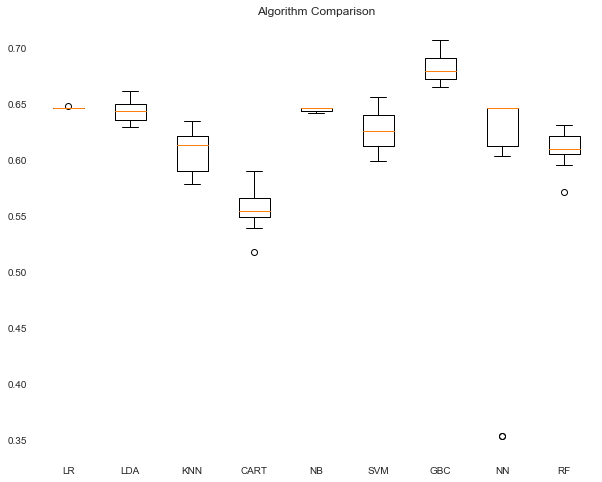

In [220]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# Parametros de Ajuste

In [223]:
modelGBC = GradientBoostingClassifier()
modelGBC.fit(X_train, y_train)
y_pred = modelGBC.predict(X_test)
print (y_pred)

[0 0 1 ... 0 0 0]


In [224]:
# Evaluate predictions
print ("Precision")
print(accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print ("Reporte de Clasificación")
print(classification_report(y_test, y_pred))
print ("RMSE")
print (mean_squared_error(y_test, y_pred)) #MSE
print ("Recall Score")
print (recall_score(y_test, y_pred, average=None))# Precision
print ("Presicion Score")
print (precision_score(y_test, y_pred, average=None))

Precision
0.6834215167548501
Confusion Matrix
[[1339  156]
 [ 562  211]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.70      0.90      0.79      1495
           1       0.57      0.27      0.37       773

    accuracy                           0.68      2268
   macro avg       0.64      0.58      0.58      2268
weighted avg       0.66      0.68      0.65      2268

RMSE
0.3165784832451499
Recall Score
[0.89565217 0.27296248]
Presicion Score
[0.70436612 0.57493188]


In [225]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5843073288711401

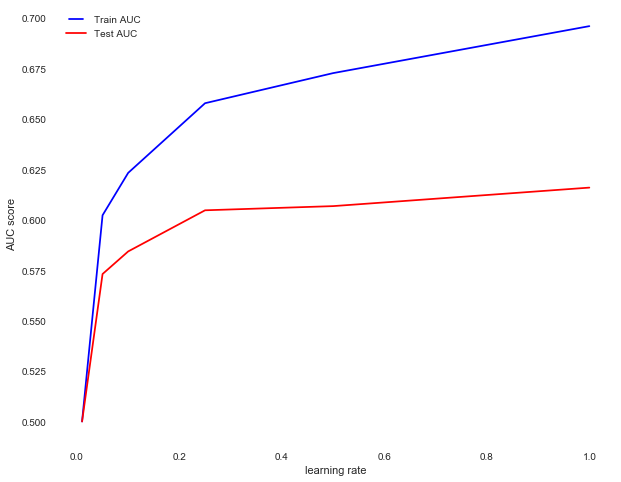

In [226]:
from sklearn.metrics import roc_curve, auc
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

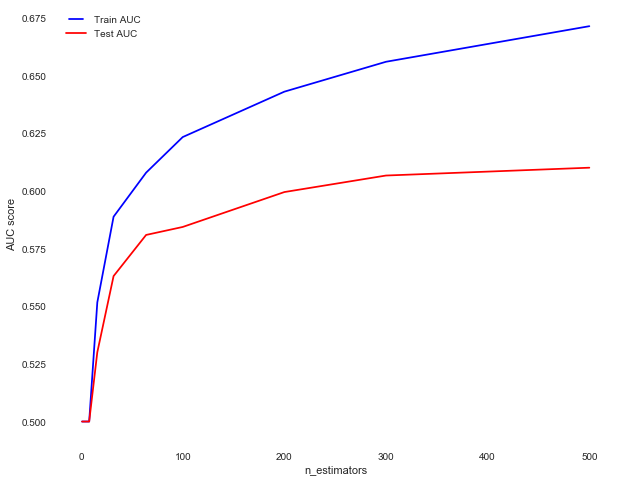

In [227]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300, 500]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

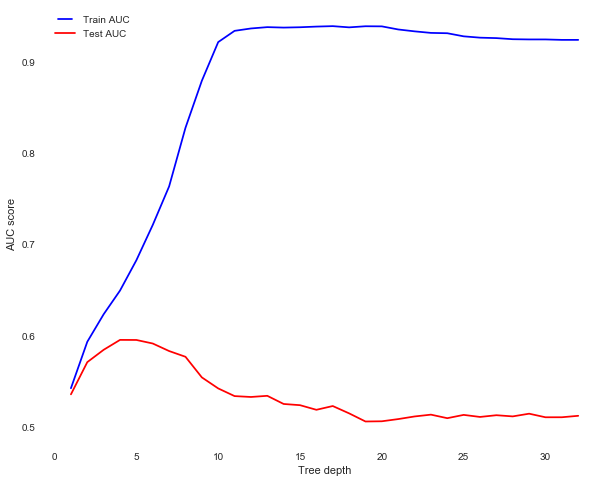

In [228]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
%time
param_grid = {'n_estimators':[10,20,30,50, 100, 200, 300,400,500],'max_depth':[2,3,4,5,7,9,11,13,14,17,35], 'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4,0.5, 0.6]}
grid_rf = GridSearchCV(GradientBoostingClassifier(),param_grid,cv=10,scoring='roc_auc').fit(X_train,y_train)
print('Mejor Parametro: {}'.format(grid_rf.best_params_))
print('Mejor Resultado: {:.2f}'.format((grid_rf.best_score_)))

Wall time: 0 ns


In [ ]:
#Nueva Evaluación con parametros ajustados
gbc = GradientBoostingClassifier(max_depth=2, n_estimators=100,learning_rate=0.4)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
print (y_pred)

In [ ]:
# Evaluación de Predicción después de Ajustar párametros
print ("Precision")
print(accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print ("Reporte de Clasificación")
print(classification_report(y_test, y_pred))
print ("RMSE")
print (mean_squared_error(y_test, y_pred)) #MSE
print ("Recall Score")
print (recall_score(y_test, y_pred, average=None))# Precision
print ("Presicion Score")
print (precision_score(y_test, y_pred, average=None))

In [ ]:
# predict probabilities
probs = gbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(GradientBoostingClassifier(max_depth=3, n_estimators=20, learning_rate=0.15), X_train, y_train, cv=3, scoring='roc_auc')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.plot(train_sizes,valid_scores_mean,label='valid')
plt.plot(train_sizes,train_scores_mean,label='train')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3,color="g")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,valid_scores_mean + valid_scores_std, alpha=0.3, color="b")
plt.xlabel('Number of samples')
plt.ylabel('ROC_AUC')
plt.legend()

In [ ]:
gbc = GradientBoostingClassifier(max_depth=2, n_estimators=100,learning_rate=0.4)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [ ]:
model2 = GradientBoostingClassifier(max_depth=2, n_estimators=100,learning_rate=0.4)
model2.fit(X_train, y_train)
predictions2 = model2.predict([[90000,2,2,2,34]])
print(predictions2[0])

In [ ]:
CreditDF2 = CreditDF.iloc[:,0:5]
PrediccionDF = gbc.predict(CreditDF2)
CreditDF2['PrediccionFinal'] = PrediccionDF

In [ ]:
filename = 'PrediccionesCreditOne.csv'
CreditDF2.to_csv(filename,index=False)
print('Saved file: ' + filename)

In [ ]:
filename = 'ResumidoCreditOne.csv'
CreditDF.to_csv(filename,index=False)
print('Saved file: ' + filename)